In [1]:
# !pip install nbconvert

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """The plotting function for tutorial"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none',edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
"""read data"""

train = pd.read_csv('training.csv').to_numpy()
test = pd.read_csv('test.csv').to_numpy()

X_train = train[:, 0:2]
Y_train = train[:, 2]
X_test = test[:, 0:2]
Y_test = test[:, 2]

# print(X_test)


prediction:  [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.88


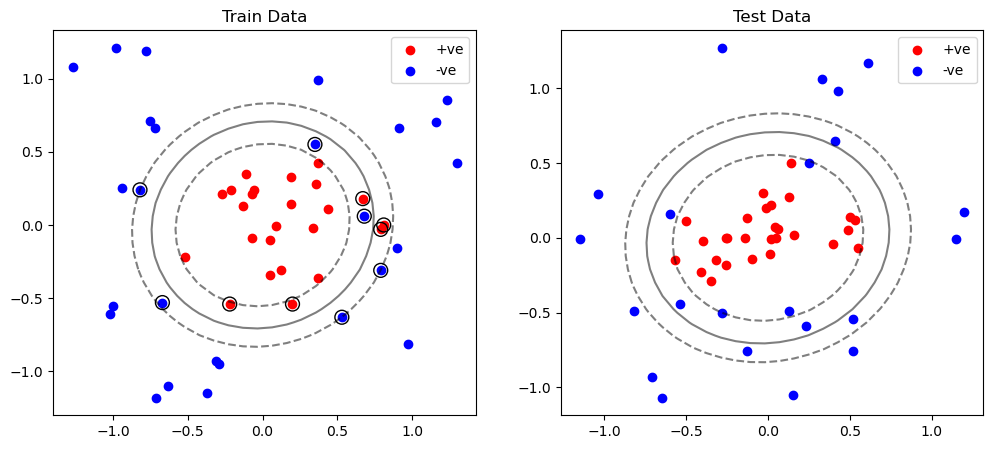

In [4]:
"""first model: poly + C=10"""
model1 = svm.SVC(kernel='poly', degree=2, C=10).fit(X_train, Y_train)

Y_pred = model1.predict(X_test)
correct_predictions = sum(Y_pred == Y_test)
total_predictions = len(Y_test)
accuracy = correct_predictions / total_predictions
print("prediction: ", Y_pred)
print("Accuracy:", accuracy)

'''plot'''
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Train Data")

X_train_pos = X_train[Y_train >= 0.5]
X_train_neg = X_train[Y_train < 0.5]
Y_train_pos = Y_train[Y_train >= 0.5]
Y_train_neg = Y_train[Y_train < 0.5]

axs[0].scatter(X_train_pos[:, 0], X_train_pos[:, 1], label='+ve', color="red")
axs[0].scatter(X_train_neg[:, 0], X_train_neg[:, 1], label='-ve', color="blue")

plot_svc_decision_function(model1, ax=axs[0])
axs[0].legend()


axs[1].set_title("Test Data")

X_test_pos = X_test[Y_test >= 0.5]
X_test_neg = X_test[Y_test < 0.5]
Y_test_pos = Y_test[Y_test >= 0.5]
Y_test_neg = Y_test[Y_test < 0.5]

axs[1].scatter(X_test_pos[:, 0], X_test_pos[:, 1], label='+ve', color="red")
axs[1].scatter(X_test_neg[:, 0], X_test_neg[:, 1], label='-ve', color="blue")

plot_svc_decision_function(model1, ax=axs[1], plot_support=False)
axs[1].legend()

plt.show()

prediction:  [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.88


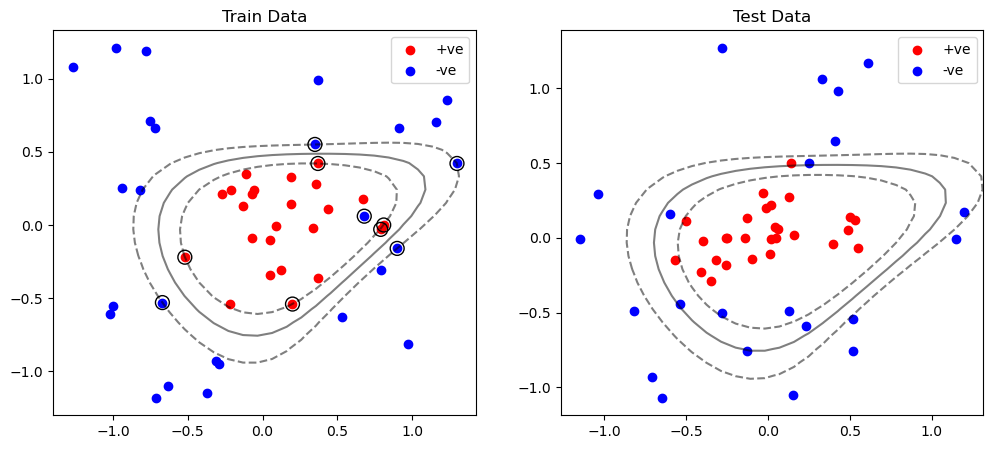

In [5]:
"""first model: rbf + C=100"""
model1 = svm.SVC(kernel='rbf', C=100).fit(X_train, Y_train)

Y_pred = model1.predict(X_test)
correct_predictions = sum(Y_pred == Y_test)
total_predictions = len(Y_test)
accuracy = correct_predictions / total_predictions
print("prediction: ", Y_pred)
print("Accuracy:", accuracy)

'''plot'''
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Train Data")

X_train_pos = X_train[Y_train >= 0.5]
X_train_neg = X_train[Y_train < 0.5]
Y_train_pos = Y_train[Y_train >= 0.5]
Y_train_neg = Y_train[Y_train < 0.5]

axs[0].scatter(X_train_pos[:, 0], X_train_pos[:, 1], label='+ve', color="red")
axs[0].scatter(X_train_neg[:, 0], X_train_neg[:, 1], label='-ve', color="blue")

plot_svc_decision_function(model1, ax=axs[0])
axs[0].legend()


axs[1].set_title("Test Data")

X_test_pos = X_test[Y_test >= 0.5]
X_test_neg = X_test[Y_test < 0.5]
Y_test_pos = Y_test[Y_test >= 0.5]
Y_test_neg = Y_test[Y_test < 0.5]

axs[1].scatter(X_test_pos[:, 0], X_test_pos[:, 1], label='+ve', color="red")
axs[1].scatter(X_test_neg[:, 0], X_test_neg[:, 1], label='-ve', color="blue")

plot_svc_decision_function(model1, ax=axs[1], plot_support=False)
axs[1].legend()

plt.show()